In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

## Data generation

In [4]:
X,y = make_blobs(n_samples = 1500, centers = [[-1,4],[2,5],[3,3]], cluster_std = 0.5)
print(X)
print(y)

[[-0.85726442  3.72726132]
 [-0.39843606  3.59973325]
 [ 3.12139215  3.26023996]
 ...
 [-1.06383074  3.44781537]
 [ 2.76494424  4.73646206]
 [ 2.16138862  5.02860178]]
[0 0 2 ... 0 1 1]


In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
print(X)

[[-1.23095097 -0.30700361]
 [-0.97160934 -0.44004136]
 [ 1.0178884  -0.794202  ]
 ...
 [-1.34770758 -0.59852264]
 [ 0.81641485  0.74579829]
 [ 0.47526964  1.05055951]]


## Modeling

In [9]:
db = DBSCAN(eps=0.3, min_samples=7)
db.fit(X)
labels = db.labels_
labels

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

## Distinguish Outlier

In [13]:
core_sample_mask = np.zeros_like(db.labels_, dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
core_sample_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

2

In [17]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1}

## Data Visualization

In [25]:
color = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

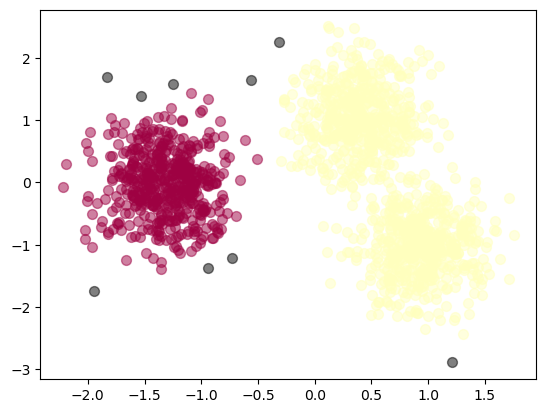

In [27]:
for k, col in zip(unique_labels, color):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_sample_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker='o', alpha=0.5)

    xy = X[class_member_mask & ~core_sample_mask]
    plt.scatter(xy[:,0], xy[:,1], s=50, c=[col], marker='o', alpha=0.5)